# Global Memory Usage Comparison

In [1]:
import os
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier

# Create lists of all file paths
def parse_paths(dir_path: str) -> list[str]:
  """
  Return a list of file paths in alphanumeric order
  """
  paths = []
  for filename in os.listdir(dir_path):
    if filename == '.DS_Store':
      continue
    file_path = os.path.join(dir_path, filename)
    if os.path.isfile(file_path):
      paths.append(file_path)
  return sorted(paths)

# Global memory trials
global_paths = parse_paths("Global500")

# Clean cache trial
clean_path = "CleanCache/xavierNoMemory1.csv"

# =================================
# Read in the data
# =================================
%cd ~/Desktop/Research/GPU-research/Preemptions
from analyzer_functions import *
%cd ~/Desktop/Research/GPU-research/Preemptions/Xavier
import numpy as np

def read_ivls(paths, single=False):
  if single:
    data, ivls = data_loader(singlePath=paths, single=True)
    return  np.array(ivls) / 1000
  ivls_array = []
  for path in paths:
    data, ivls = data_loader(singlePath=path, single=True)
    # Convert to microseconds
    ivls = np.array(ivls) / 1000
    ivls_array.append(ivls)
  return ivls_array

# Load global memory trials
global_ivls = read_ivls(global_paths)

# Load clean cache data
clean_ivls = read_ivls(clean_path, single=True)


/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier
/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions
/Users/alexgeorgiev/Desktop/Research/GPU-research/Preemptions/Xavier


In [3]:
# Verify paths
global_paths

['Global500/AxavierGlobal500.csv',
 'Global500/BxavierGlobal1000.csv',
 'Global500/CxavierGlobal1500.csv',
 'Global500/DxavierGlobal2000.csv',
 'Global500/ExavierGlobal2500.csv',
 'Global500/FxavierGlobal3000.csv',
 'Global500/GxavierGlobal3500.csv',
 'Global500/HxavierGlobal4000.csv',
 'Global500/IxavierGlobal4500.csv',
 'Global500/JxavierGlobal5000.csv',
 'Global500/KxavierGlobal5500.csv',
 'Global500/LxavierGlobal6000.csv',
 'Global500/MxavierGlobal6500.csv',
 'Global500/NxavierGlobal7000.csv',
 'Global500/OxavierGlobal7500.csv',
 'Global500/PxavierGlobal8000.csv',
 'Global500/QxavierGlobal8500.csv',
 'Global500/RxavierGlobal9000.csv',
 'Global500/SxavierGlobal9500.csv']

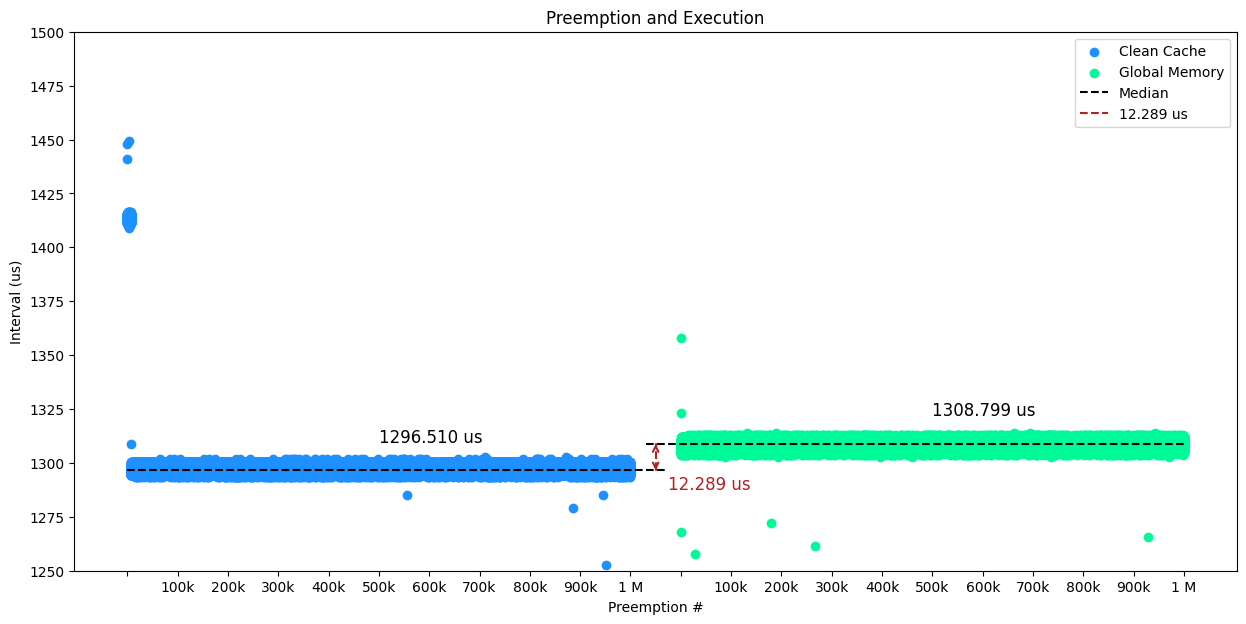

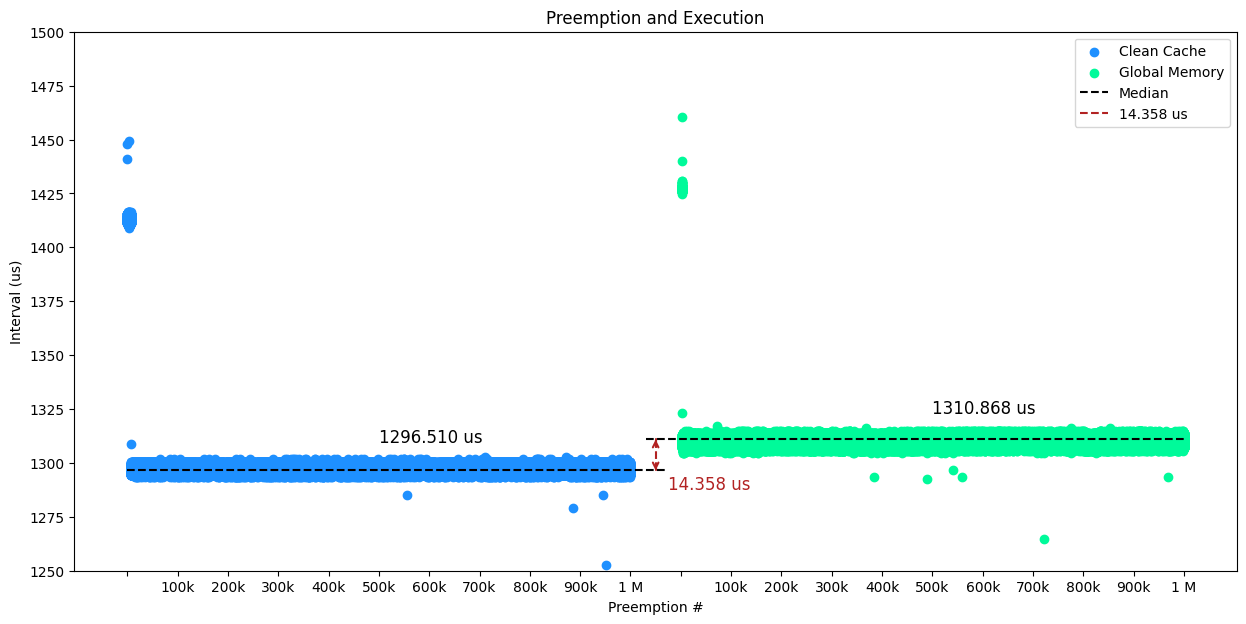

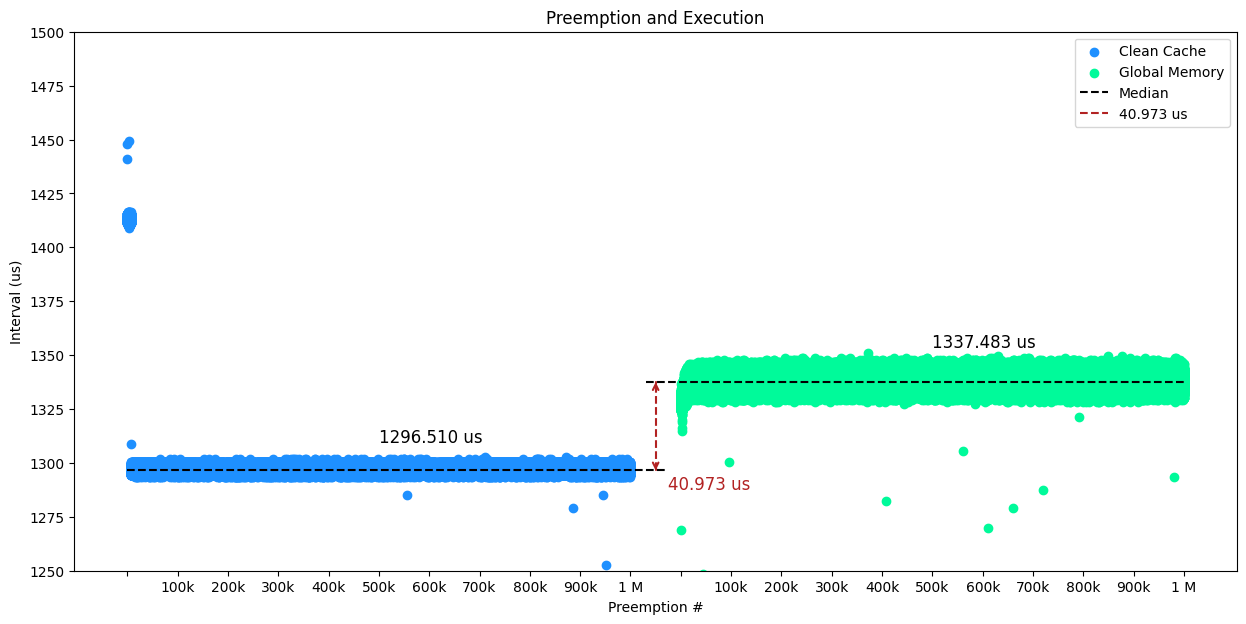

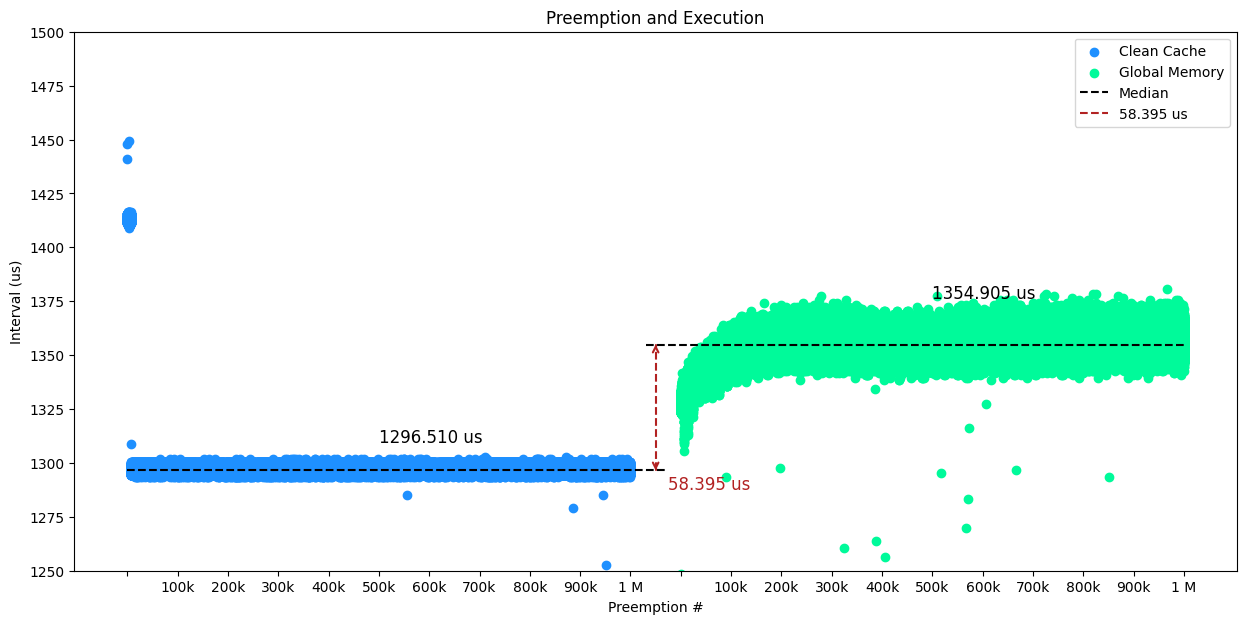

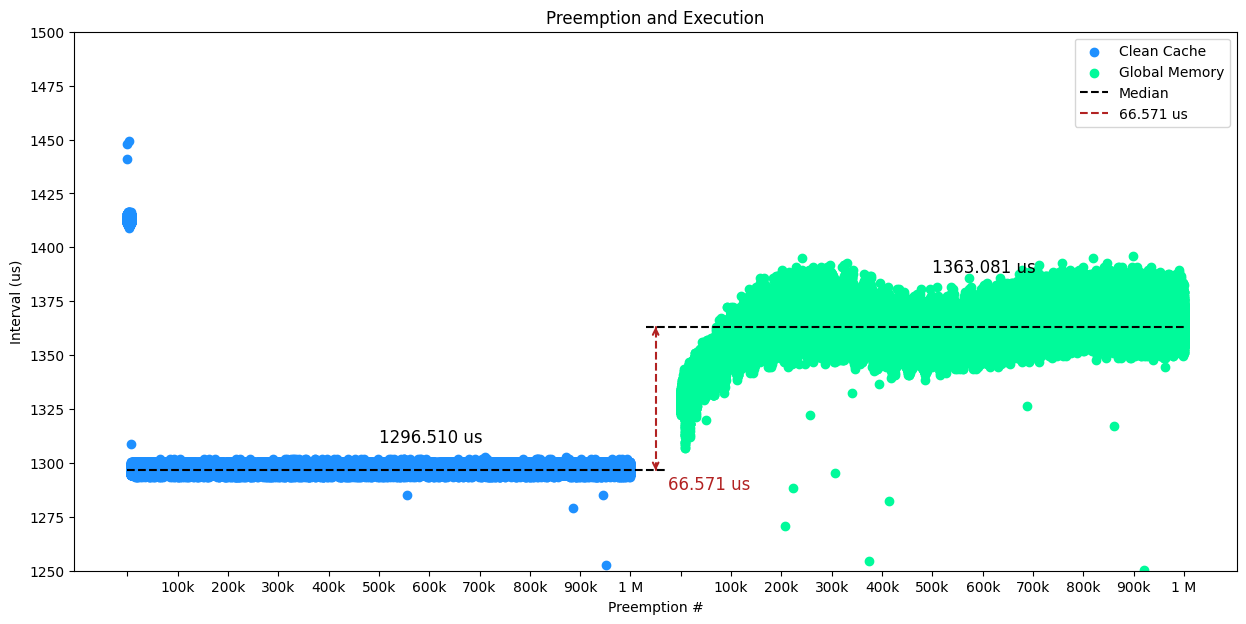

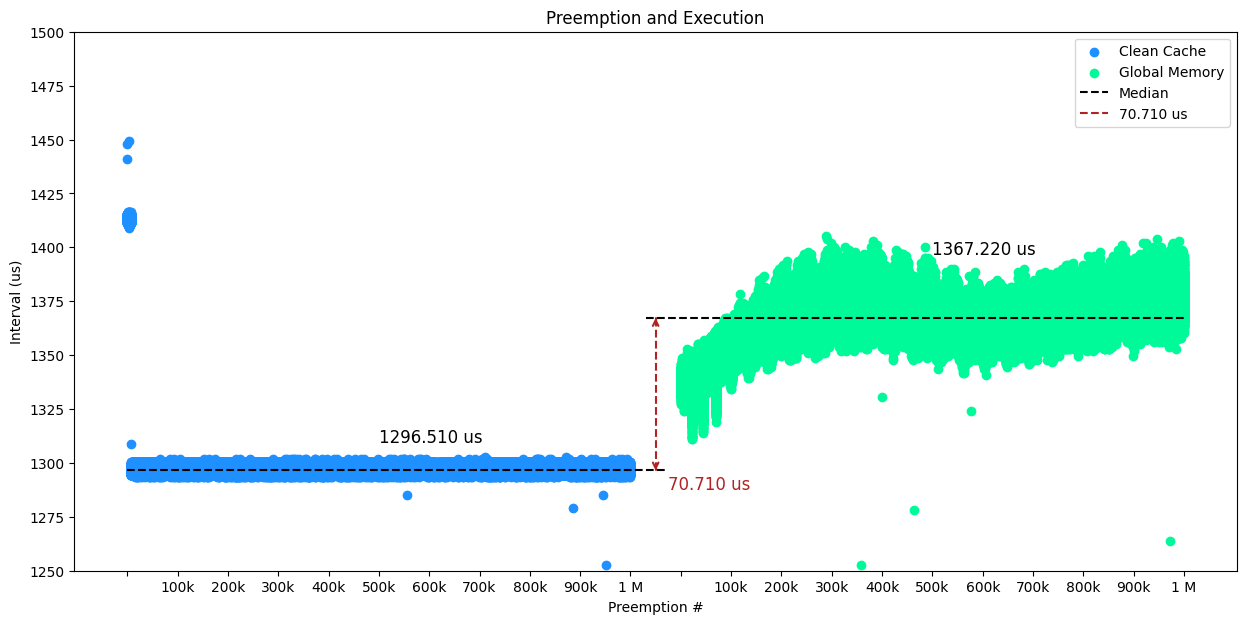

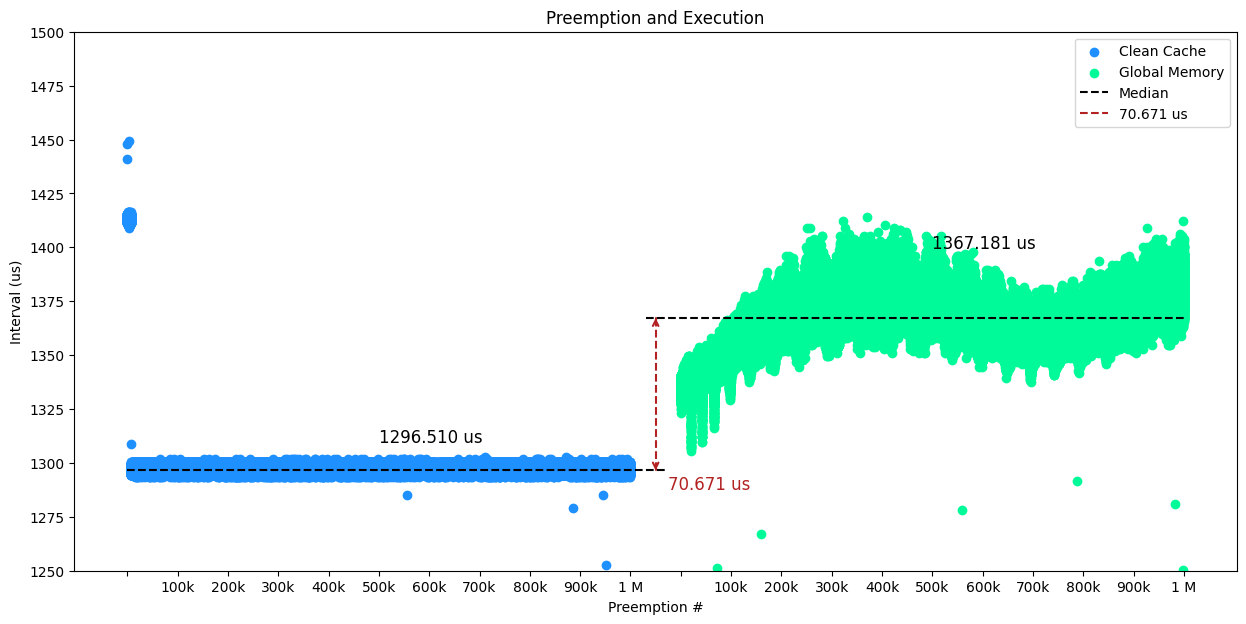

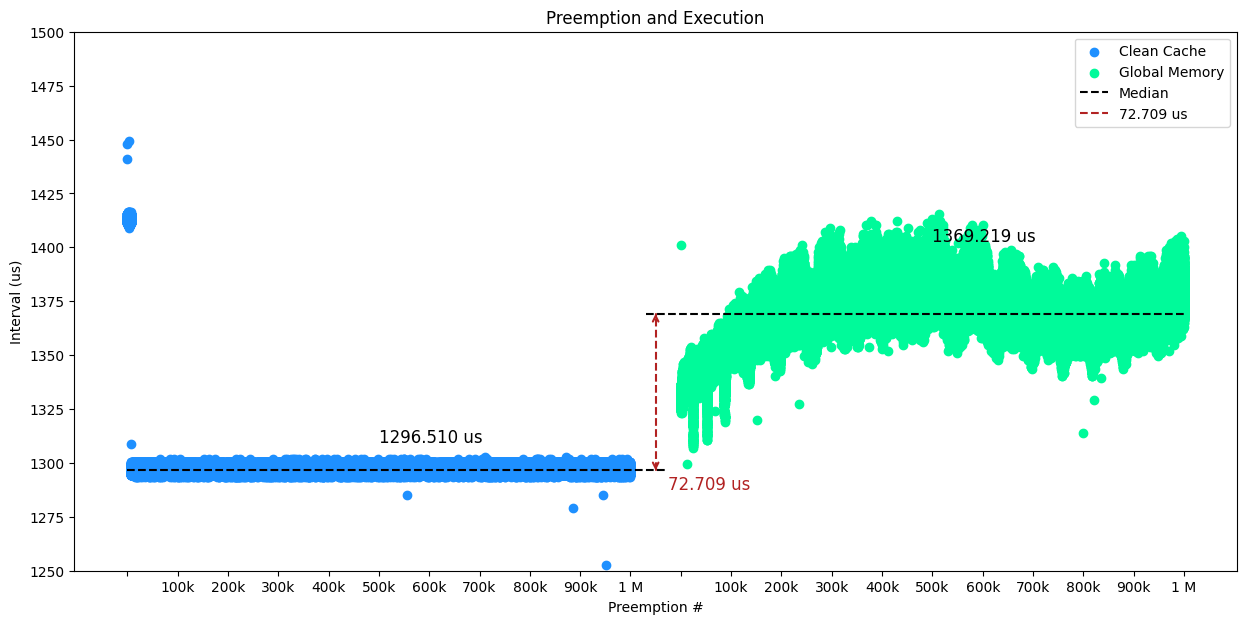

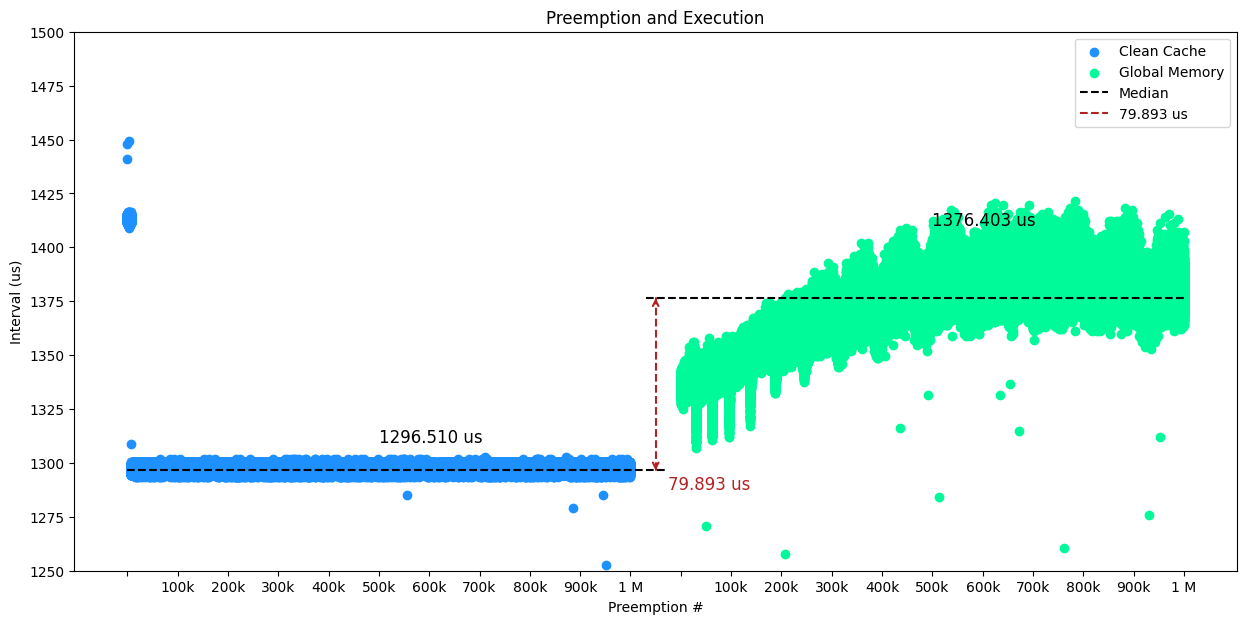

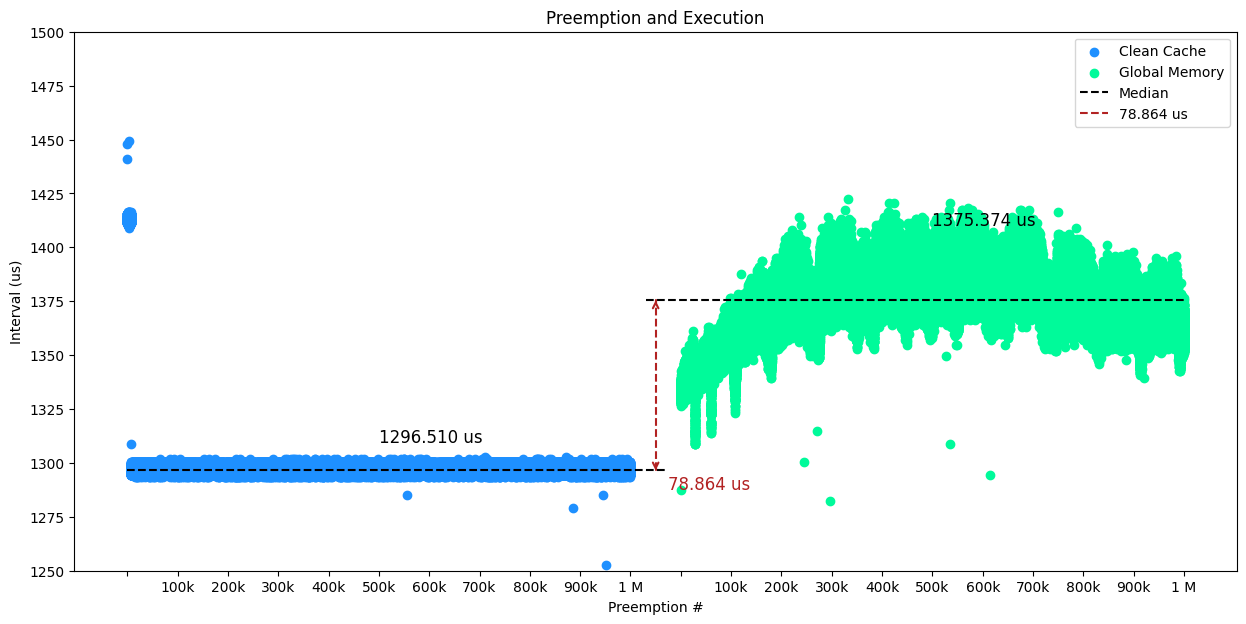

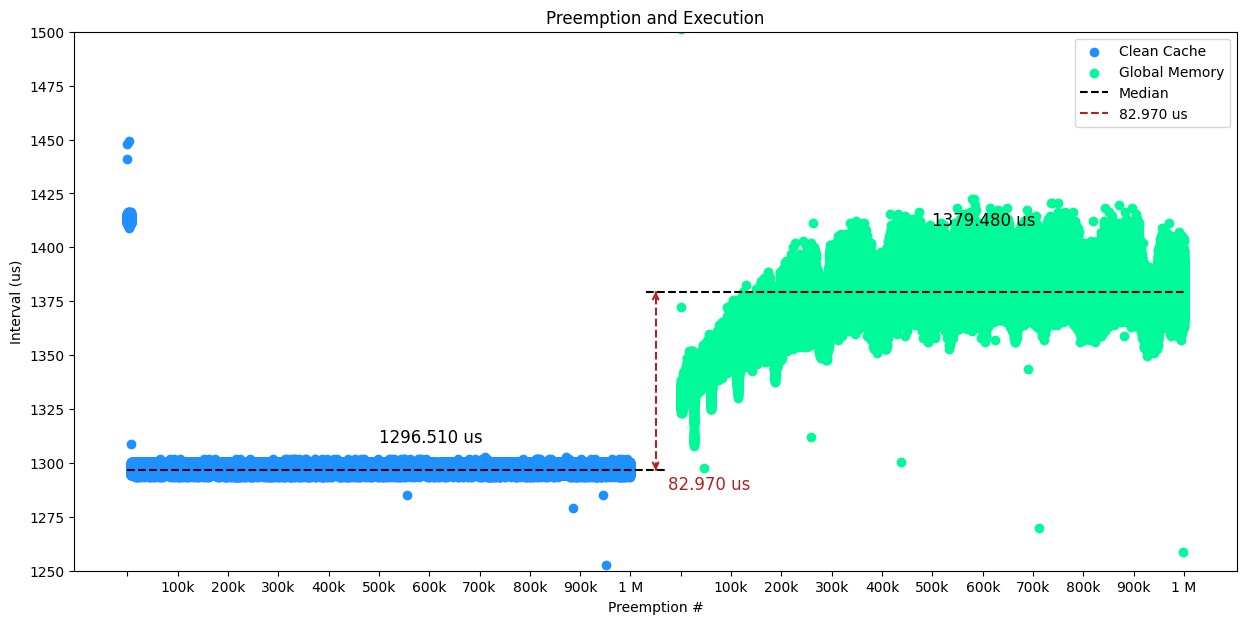

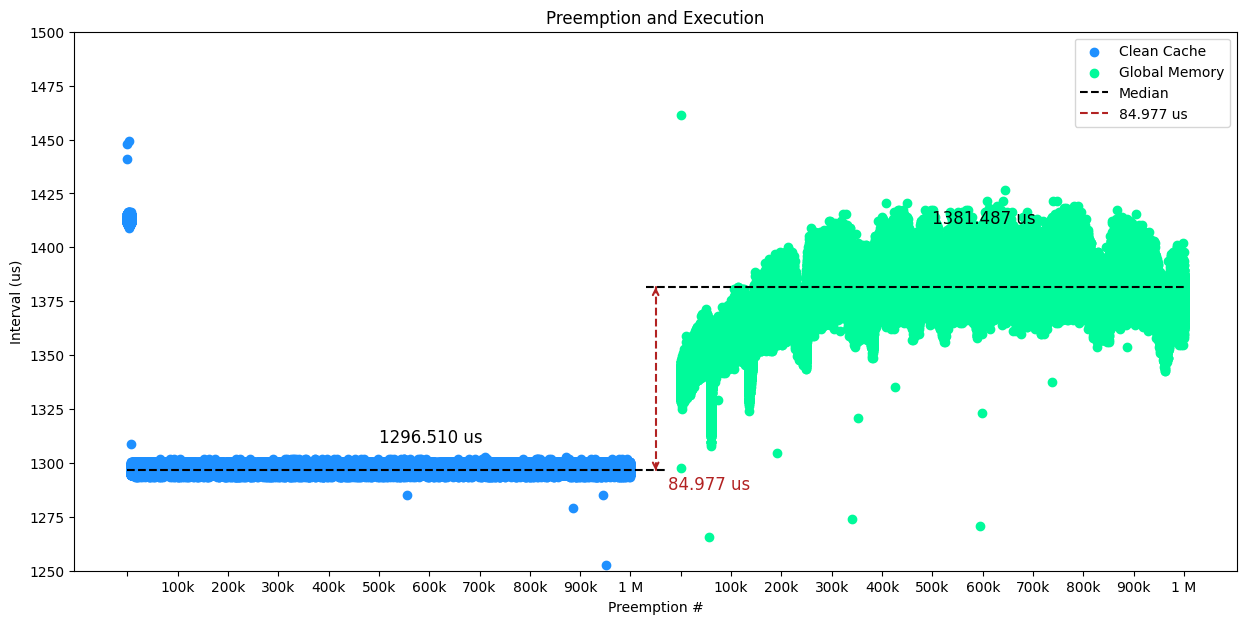

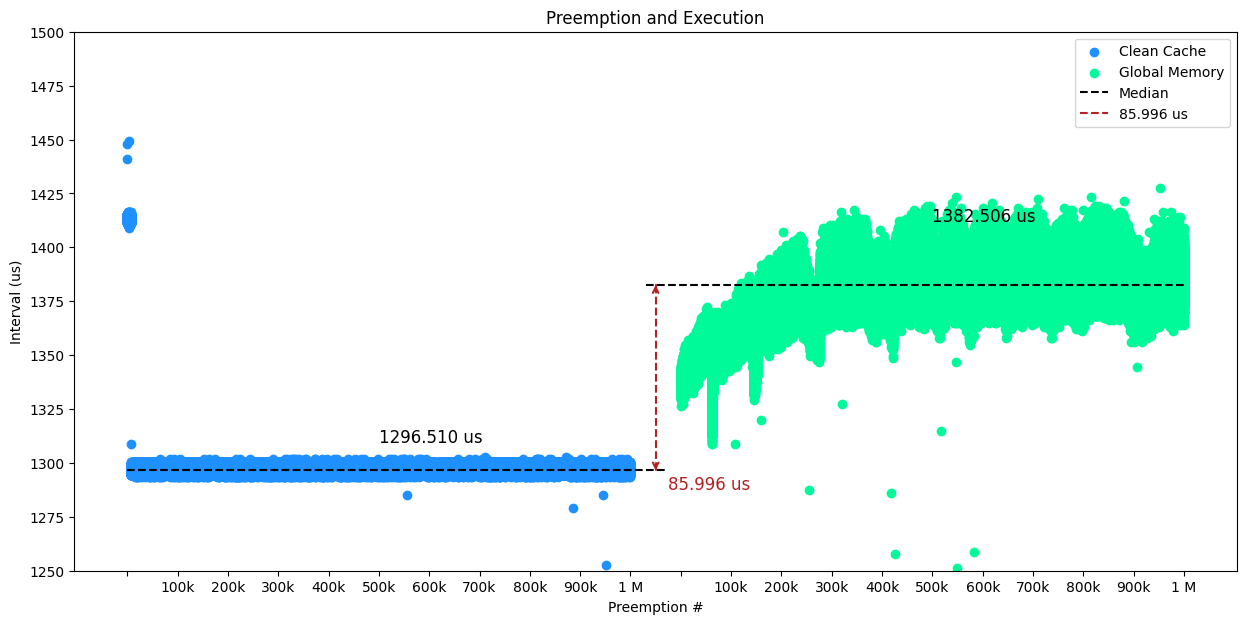

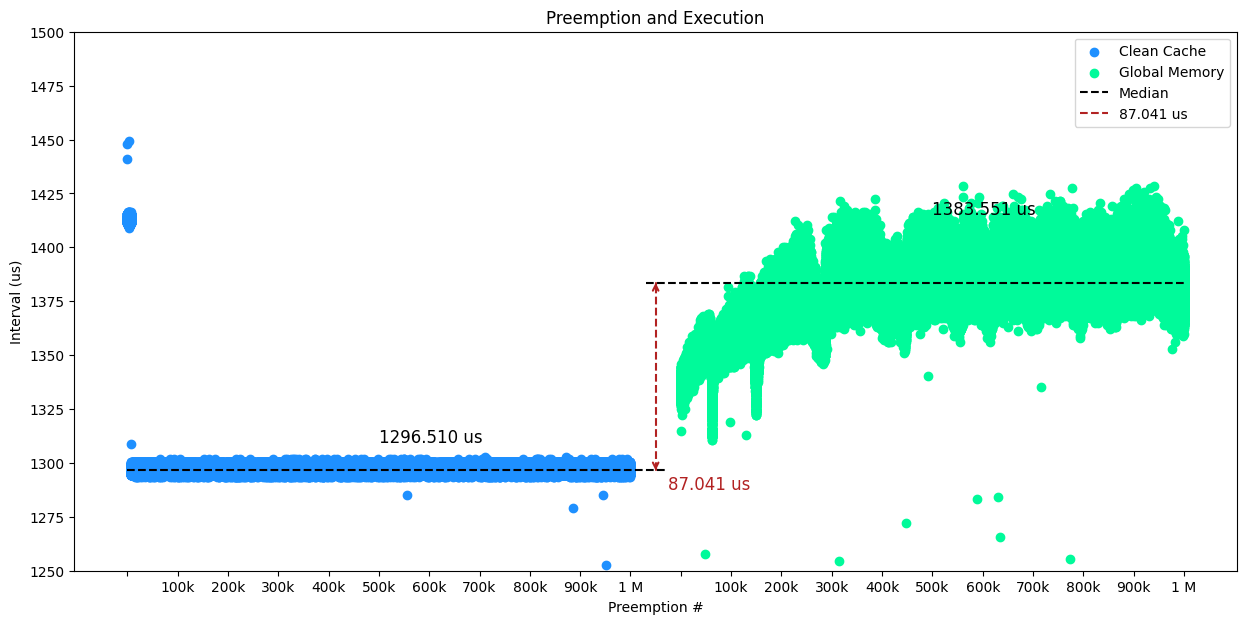

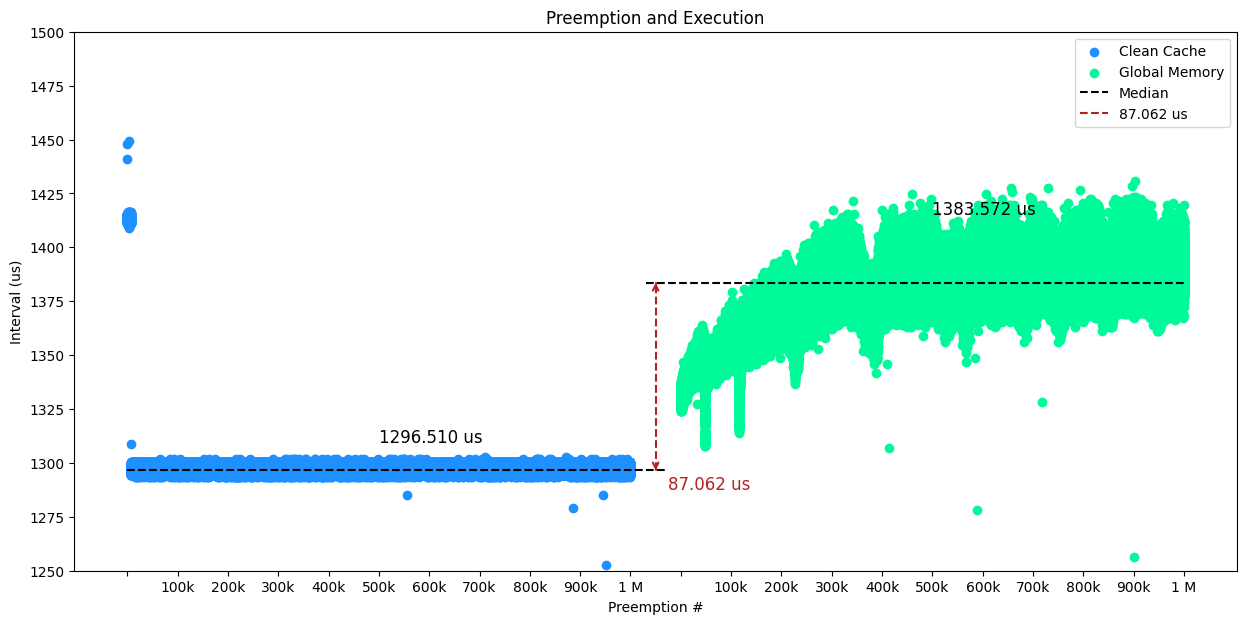

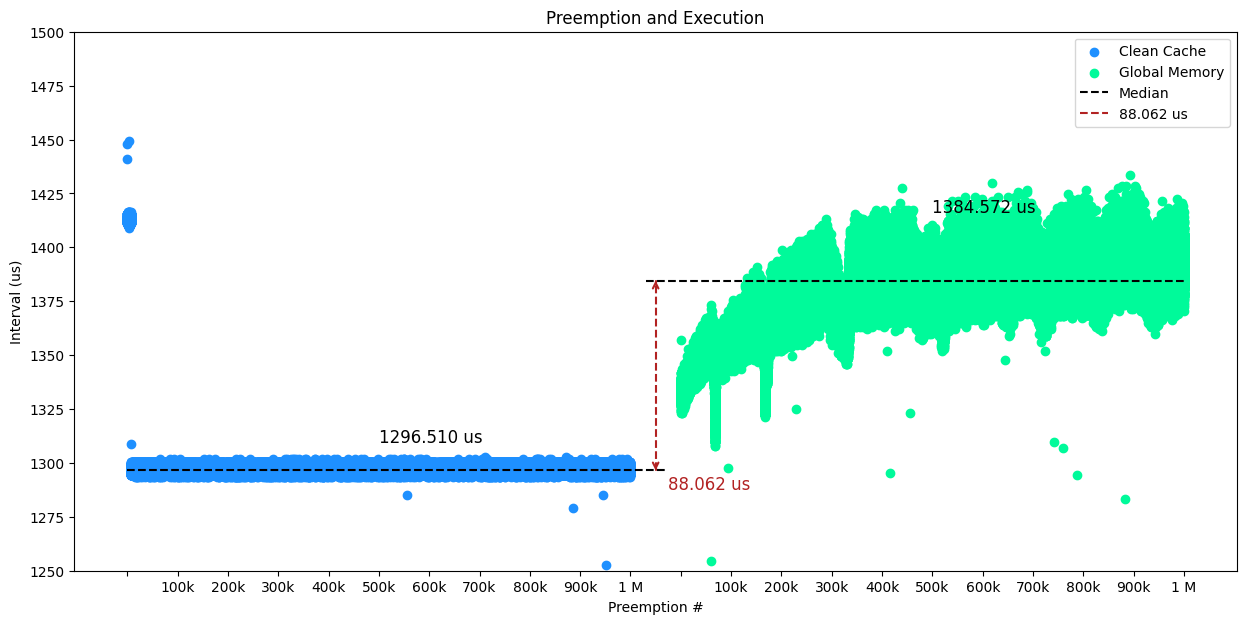

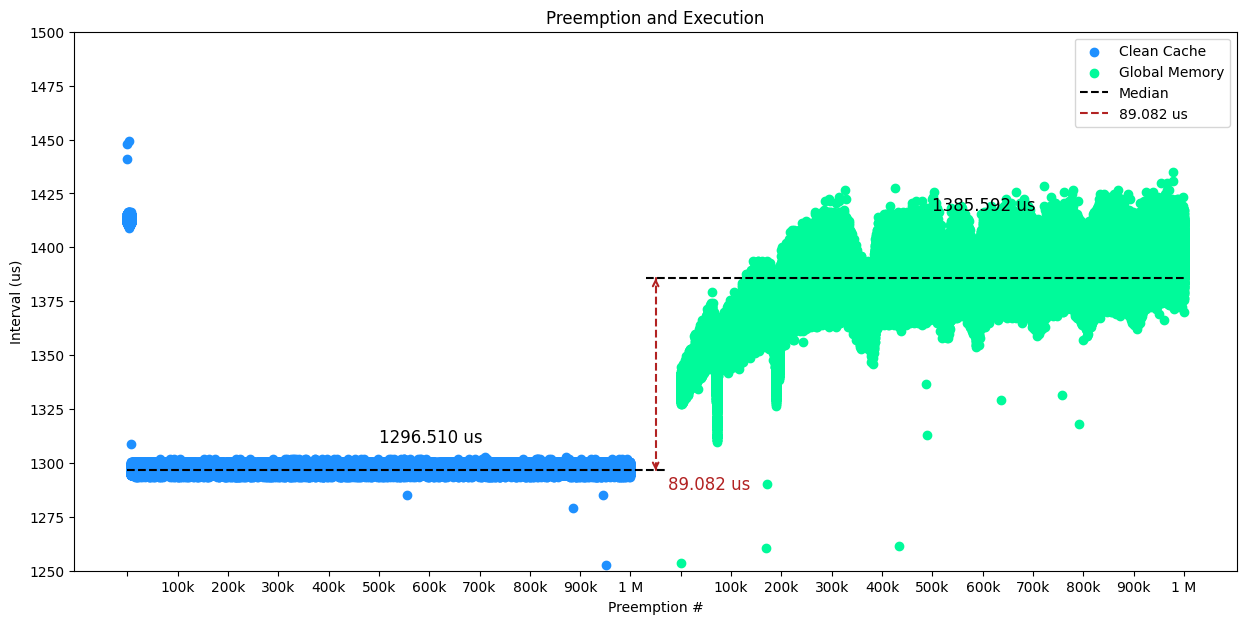

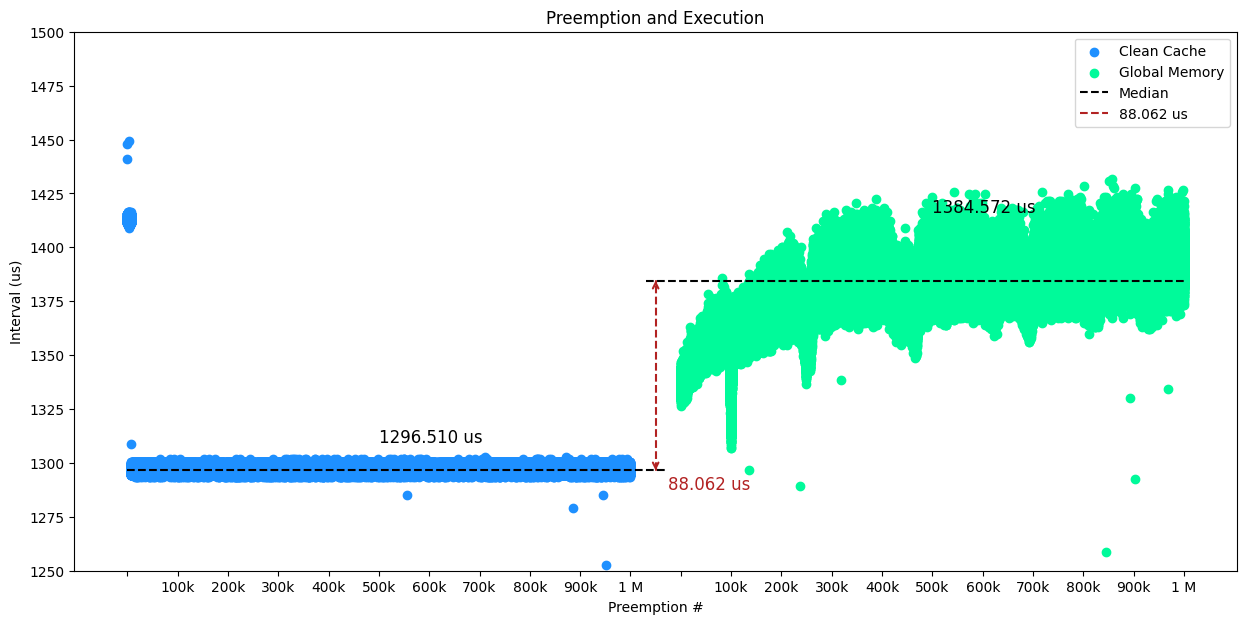

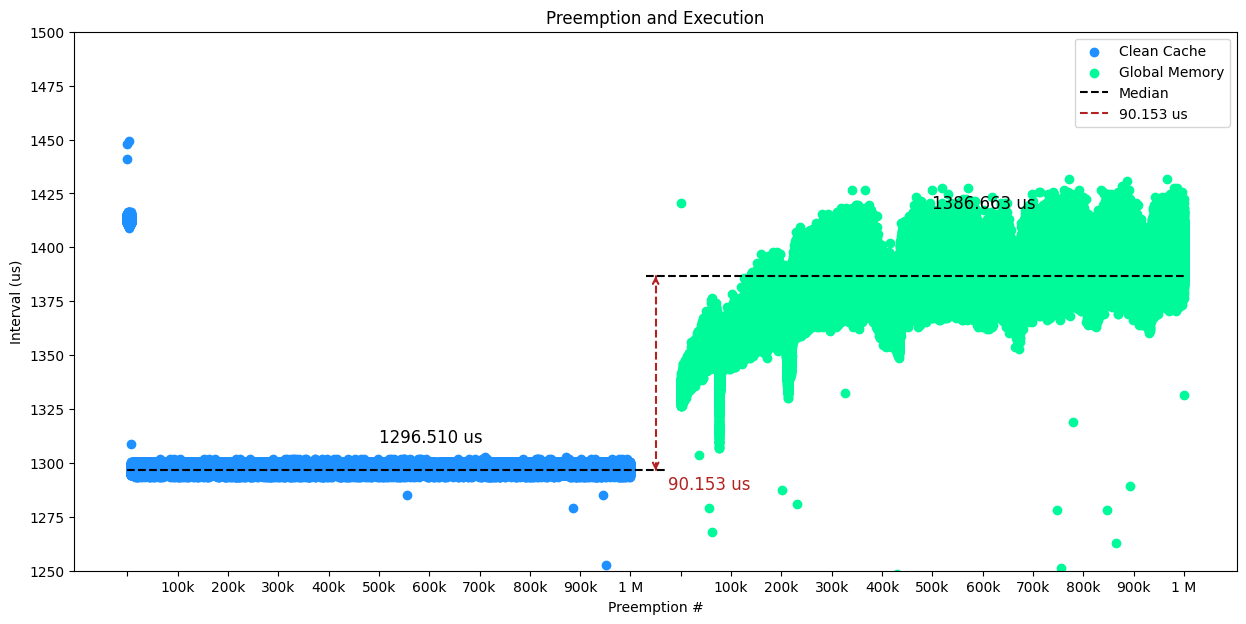

In [2]:
def plot_ivls(left_ivls, right_ivls, left_label, right_label, dual=False):
  NUM_SAMPLES = 1000000
  offset = NUM_SAMPLES // 10
  if dual:
    for left, right in zip(left_ivls, right_ivls):
      plot_side_by_side(noSharedData=left, sharedData=right, NUM_SAMPLES=NUM_SAMPLES, lowerBound=1.25e3, upperBound=1.5e3, 
                        medianLines=True, offset=offset, firstLabel=left_label, secondLabel=right_label)  
  else:
    for ivls in right_ivls:
      plot_side_by_side(noSharedData=left_ivls, sharedData=ivls, NUM_SAMPLES=NUM_SAMPLES, lowerBound=1.25e3, upperBound=1.5e3, 
                        medianLines=True, offset=offset, firstLabel=left_label, secondLabel=right_label)

plot_ivls(clean_ivls, global_ivls, left_label="Clean Cache", right_label="Global Memory")